# Deep-Learning with Keras

#### Ugur URESIN, AI Engineer | Data Scientist
#### Mail: uresin.ugur@gmail.com

## Chapter 02. Neural Networks - Image Classification

### Dataset: MNIST

### The Steps
* **Step01**. Loading Dataset
* **Step02**. Assesing the Dataset
* **Step03**. Building the network architecture
* **Step04**. The compilation
* **Step05**. Data preperation
* **Step06**. Preparing the labels (categorical transformation)
* **Step07**. Training
* **Step08**. Evaluating the performance

#### Step 01. Loading Dataset

In [1]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### Step 02. Assesing the Dataset

In [3]:
print("Training image dimensions:", train_images.shape)
print("Number of training labels:", len(train_labels))
print("Test image dimensions:", test_images.shape)
print("Number of test labels:", len(test_labels))

Training image dimensions: (60000, 28, 28)
Number of training labels: 60000
Test image dimensions: (10000, 28, 28)
Number of test labels: 10000


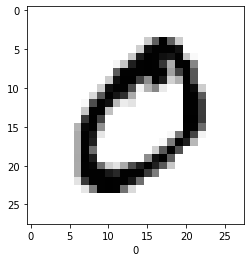

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Let's look at a one image
IMG_INDEX = 1  # change to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(train_labels[IMG_INDEX])
plt.show()

#### Step03. Building the network architecture

In [5]:
from keras import models
from keras import layers

'''
Here, the network (model) consists of a sequence of two Dense layers.
Dense layers are also called fully connected layers.
The second layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (sum=1).
Each score will be the probability that the current digit image belongs to one of 10 digit classes.
'''
model = models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28*28,))) 
model.add(layers.Dense(10, activation="softmax"))

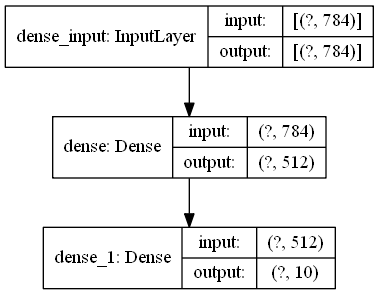

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_ch02.png', show_shapes=True, show_layer_names=True)

#### Step04. The compilation

In [7]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

#### Step05. Data preperation

In [8]:
#Re-Shaping the Images
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

#Normalizing the Images for Faster Converging
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#### Step06. Preparing the labels (categorical transformation)

In [9]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### Step07. Training

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2575 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1034 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0680 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0494 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0369 - accuracy: 0.9893


#### Step08. Evaluating the performance

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9797
test_acc: 0.9797000288963318


* The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training set accuracy.  
* This gap between training accuracy and test accuracy is an example of **overfitting**.  
* It's a the fact that machine-learning models tend to perform worse on new data than on their training data.